<a href="https://colab.research.google.com/github/samahalkayedktaishat/Machine-Learning/blob/main/Twitter_Viral_Classification_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt 

In [11]:
all_tweets = pd.read_json("/content/drive/MyDrive/twitter/twitter_classification_project/random_tweets.json" , lines = True)
print(all_tweets.columns) 

Index(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities',
       'metadata', 'source', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo',
       'coordinates', 'place', 'contributors', 'retweeted_status',
       'is_quote_status', 'retweet_count', 'favorite_count', 'favorited',
       'retweeted', 'lang', 'possibly_sensitive', 'quoted_status_id',
       'quoted_status_id_str', 'extended_entities', 'quoted_status',
       'withheld_in_countries'],
      dtype='object')


In [12]:
print(all_tweets['retweet_count'])

0            3
1            0
2            5
3        11106
4            6
         ...  
11094     2582
11095     6753
11096        0
11097        3
11098        0
Name: retweet_count, Length: 11099, dtype: int64


In [13]:
median = np.median(all_tweets['retweet_count'])
print(median)

13.0


In [15]:
all_tweets["viral"] = np.where(all_tweets['retweet_count'] > median , 1 , 0)
print(all_tweets["viral"])

0        0
1        0
2        0
3        1
4        0
        ..
11094    1
11095    1
11096    0
11097    0
11098    0
Name: viral, Length: 11099, dtype: int64


In [25]:
all_tweets["Length"] = all_tweets.apply(lambda tweet : len(tweet['text']) , axis = 1)

print(all_tweets["Length"])

all_tweets["followers_count"] = all_tweets.apply(lambda tweet : tweet['user']["followers_count"] , axis = 1)

print(all_tweets["followers_count"])

all_tweets["friends_count"] = all_tweets.apply(lambda tweet : tweet['user']["friends_count"] , axis = 1)

print(all_tweets["friends_count"])

all_tweets["hashtag_count"] = all_tweets.apply(lambda tweet : tweet["text"].count("#") , axis= 1)
print(all_tweets["hashtag_count"] )

0        140
1         77
2        140
3        140
4        140
        ... 
11094    140
11095     75
11096    140
11097    140
11098     75
Name: Length, Length: 11099, dtype: int64
0         215
1         199
2         196
3        3313
4         125
         ... 
11094     509
11095     462
11096     135
11097      59
11098    1563
Name: followers_count, Length: 11099, dtype: int64
0         335
1         203
2         558
3        2272
4         273
         ... 
11094    1323
11095    1033
11096      90
11097     320
11098    1697
Name: friends_count, Length: 11099, dtype: int64
0        0
1        0
2        0
3        0
4        0
        ..
11094    0
11095    0
11096    0
11097    0
11098    0
Name: hashtag_count, Length: 11099, dtype: int64


In [27]:
labels = all_tweets["viral"] 
data = all_tweets[["Length" , "followers_count" , "friends_count" , "hashtag_count"]]

In [30]:
scaled_data = scale(data , axis = 0)

In [39]:
x_train , x_test , y_train ,y_test = train_test_split(data , labels ,test_size = 0.2 , random_state = 1 )
score = []

In [38]:
classifier = KNeighborsClassifier(n_neighbors= 5)
classifier.fit(x_train , y_train)
print(classifier.score(x_test , y_test)) 

0.5585585585585585


In [41]:
for k in range(1,200):
  classifier = KNeighborsClassifier(n_neighbors= k)
  classifier.fit(x_train , y_train)
  score.append(classifier.score(x_test , y_test)) 

print(max(score)) 


0.5833333333333334


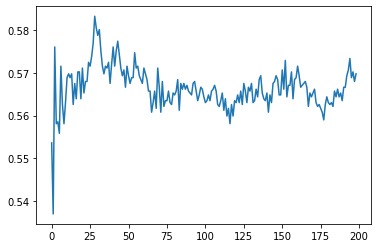

In [46]:
plt.plot( score)
plt.show()